

* Dicas de markdown: [https://colab.research.google.com/notebooks/markdown_guide.ipynb](https://colab.research.google.com/notebooks/markdown_guide.ipynb)

In [29]:
#  !pip install mpld3

Importar as bibliotecas para solução de ODE's

In [30]:
%matplotlib widget
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
# import mpld3
# from mpld3 import plugins


# %matplotlib ipympl

Constantes de Simulação

In [31]:
g=9.8
m1=.025
m2=.015
l1=.2
l2=.14

Definição das funções:

$\dfrac{d\omega_1}{dt} = \dfrac{-g (2m_1 + m_2) \sin(\theta_1) - m_2 g \sin(\theta_1 - 2\theta_2) - 2 \sin(\theta_1 - \theta_2) m_2 (\omega_2^2 l_2 + \omega_1^2 l_1 \cos(\theta_1 - \theta_2) )}{l_1 (2m_1 + m_2 - m_2\cos(2\theta_1 - 2\theta_2) )}$

$\dfrac{d\omega_2}{dt} = \dfrac{2 \sin(\theta_1-\theta_2) (\omega_1^2 l_1 (m_1+m_2) + g(m_1+m_2)\cos(\theta_1) + \omega_2^2 l_2 m_2 \cos(\theta_1-\theta_2) )}{l_2 (2m_1 + m_2 - m_2\cos(2\theta_1-2\theta_2) ) }$

$\dfrac{d\theta_1}{dt} = \omega_1$

$\dfrac{d\theta_2}{dt} = \omega_2$

In [32]:
def f1(w1, w2, theta_01, theta_02):
    dw1dt = (-g * (2 * m1 + m2) * np.sin(theta_01) - m2 * g * np.sin(theta_01 - 2 * theta_02) - 2 * np.sin(theta_01 - theta_02) * m2 *(w2 * w2 * l2 + w1 * w1 * l1 * np.cos(theta_01 - theta_02) ) ) / (l1 * (2 * m1 + m2 - m2 * np.cos(2*theta_01 - 2*theta_02) ) )
    return dw1dt

In [33]:
def f2(w1, w2, theta_01, theta_02):
    dw2dt = ( 2 * np.sin(theta_01-theta_02) * (w1*w1*l1*(m1+m2) + g*(m1+m2)*np.cos(theta_01) + w2*w2*l2*m2*np.cos(theta_01-theta_02) ) ) / (l2 * (2*m1 + m2 - m2*np.cos(2*theta_01-2*theta_02) ) )
    return dw2dt

In [34]:
def f3(w1, w2, theta_01, theta_02):
    return w1

In [35]:
def f4(w1, w2, theta_01, theta_02):
    return w2

In [36]:
def model(t,z):
    dw1dt  = f1(z[0], z[1], z[2], z[3])
    dw2dt  = f2(z[0], z[1], z[2], z[3])
    dth1dt = f3(z[0], z[1], z[2], z[3])
    dth2dt = f4(z[0], z[1], z[2], z[3])
    
    dzdt = [dw1dt, dw2dt, dth1dt, dth2dt]
    return dzdt

Condições Iniciais

In [37]:
z0 = np.array([0, 0, 20, 20])*np.pi/180
t_inicial = 0
t_final = 10
N_pts = 500
t = np.linspace(t_inicial, t_final, N_pts)

Solver

In [38]:
th = solve_ivp(model, (t_inicial, t_final), z0, t_eval=t, max_step=5e-3)

Plot da solução

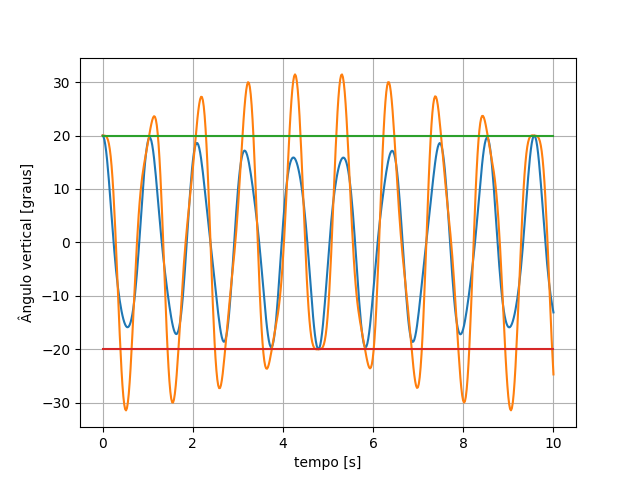

In [39]:
plt.figure()
th1 = th.y[2,:]
th2 = th.y[3,:]
plt.plot(th.t, np.rad2deg(th1))
plt.plot(th.t, np.rad2deg(th2))
plt.plot([0,t_final],np.rad2deg([z0[2],z0[2]]))
plt.plot([0,t_final],np.rad2deg([-z0[2],-z0[2]]))
plt.xlabel('tempo [s]')
plt.ylabel('Ângulo vertical [graus]')
plt.grid('on')
# mpld3.display()
plt.show()

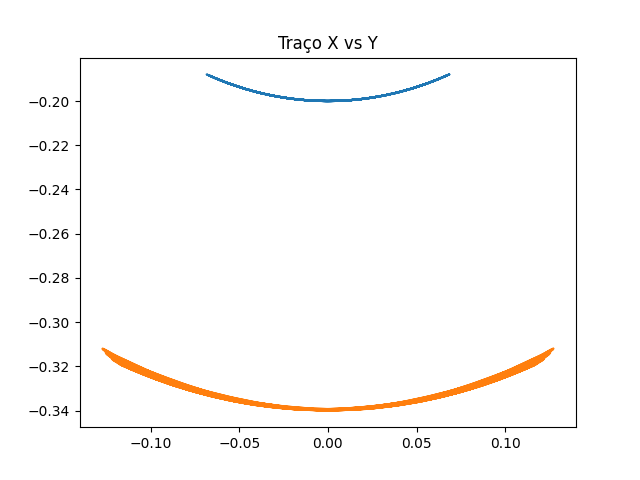

In [40]:
x1 = l1*np.sin(th1)
y1 = -l1*np.cos(th1)
x2 = x1 + l2*np.sin(th2)
y2 = y1 - l2*np.cos(th2)

plt.figure()
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.title('Traço X vs Y')
plt.show()

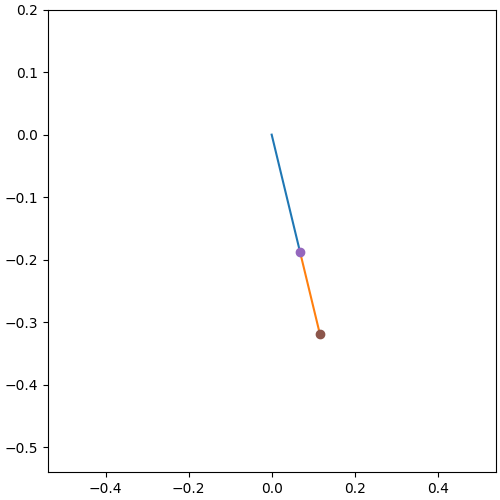

In [41]:
fig = plt.figure(figsize=(5, 5), constrained_layout=True)



#Traço X vs Y

ax = plt.subplot(111)

line1, = ax.plot([0,x1[0]],[0,y1[0]])
line2, = ax.plot([x1[0],x2[0]],[y1[0],y2[0]])
line3, = ax.plot([x1[0],x1[0]],[y1[0],y1[0]])
line4, = ax.plot([x2[0],x2[0]],[y2[0],y2[0]])

pt1, = ax.plot(x1[0], y1[0],'o')
pt2, = ax.plot(x2[0], y2[0],'o')

#plt.axis('equal')
plt.xlim(-(l1+l2)-.2,(l1+l2)+.2)
plt.ylim(-(l1+l2)-.2,.2)

def init():
    line1.set_xdata([0, x1[0]])  # update the data.
    line1.set_ydata([0, y1[0]])  # update the data.
    line2.set_xdata([x1[0], x2[0]])  # update the data.
    line2.set_ydata([y1[0], y2[0]])  # update the data.
    line3.set_xdata([x1[0], x1[0]])  # update the data.
    line3.set_ydata([y1[0], y1[0]])  # update the data.
    line4.set_xdata([x2[0], x2[0]])  # update the data.
    line4.set_ydata([y2[0], y2[0]])  # update the data.
    pt1.set_xdata(x1[0])  # update the data.
    pt1.set_ydata(y1[0])  # update the data.
    pt2.set_xdata(x2[0])  # update the data.
    pt2.set_ydata(y2[0])  # update the data.
    return line1,line2,pt1,pt2


def animate(i):
    ax.set_title("Tempo: {:.2f}s".format(t[i]))
    line1.set_xdata([0, x1[i]])  # update the data.
    line1.set_ydata([0, y1[i]])  # update the data.
    line2.set_xdata([x1[i], x2[i]])  # update the data.
    line2.set_ydata([y1[i], y2[i]])  # update the data.
    line3.set_xdata(x1[0:i])  # update the data.
    line3.set_ydata(y1[0:i])  # update the data.
    line4.set_xdata(x2[0:i])  # update the data.
    line4.set_ydata(y2[0:i])  # update the data.
    pt1.set_xdata(x1[i])  # update the data.
    pt1.set_ydata(y1[i])  # update the data.
    pt2.set_xdata(x2[i])  # update the data.
    pt2.set_ydata(y2[i])  # update the data.
    return line1,line2,line3,line4,pt1,pt2,ax,

ani = animation.FuncAnimation(
    fig, animate, frames=N_pts, init_func=init, interval=(t[1]-t[0])*1000, blit=True, save_count=N_pts, repeat=True, repeat_delay=0)
# rc('animation', html='html5')
ani
plt.show()

In [42]:
np.arange(1, 40, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])